In [1]:
using DifferentialEquations
using OrdinaryDiffEq
using Plots

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


In [ ]:
function plot_arensdorf()
     μ   = 0.012277471
     μ′  = 1 - μ

     function arensdorf_orbit(du, u, z, p, t)
         x, y  = z
         x′,y′ = u

         D(z) = ((x + z)^2  + y^2)^(3/2)
         D1 = D( μ)
         D2 = D(-μ′)

         x′′ = x + 2y′  - (μ′*(x + μ)/D1) - (μ*(x - μ′)/D2)
         y′′ = y - 2x′  - (μ′*y/D1)       - (μ*y/D2)

         du[1] = x′′
         du[2] = y′′
     end


     initial_positions =  [0.994,  0]
     initial_velocities = [0.0,   -2.00158510637908252240537862224]
    
    plot(sol,vars=(3,4))

scatter!([sol[3,1]],[sol[4,1]])

scatter!([sol[3,end]],[sol[4,end]])

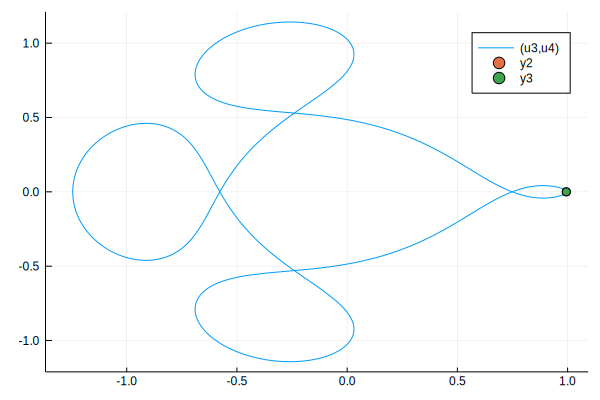

In [44]:
function plot_arensdorf()
     μ   = 0.012277471
     μ′  = 1 - μ

     function arensdorf_orbit(du, u, z, p, t)
         x, y  = z
         x′,y′ = u

         D(z) = ((x + z)^2  + y^2)^(3/2)
         D1 = D( μ)
         D2 = D(-μ′)

         x′′ = x + 2y′  - (μ′*(x + μ)/D1) - (μ*(x - μ′)/D2)
         y′′ = y - 2x′  - (μ′*y/D1)       - (μ*y/D2)

         du[1] = x′′
         du[2] = y′′
     end


     initial_positions =  [0.994,  0]
     initial_velocities = [0.0,   -2.00158510637908252240537862224]
    
     # After I asked for help on the julia discourse, 
     # Christopher Rackauckas and Chris Hanson chimed in and suggested
     # a few changes, including which solver to use.  It turns out that this
     # problem has a reputation for being able to blow up solvers :-) Anyhow,
     # now there is a nice plot. Yay!
     N = 1
     tend = 17.0652165601579625588917206249
     tspan = (0.0, N*tend)
     prob = SecondOrderODEProblem(arensdorf_orbit, initial_velocities, initial_positions, tspan)
    

     sol = solve(prob, Vern9(), abstol=1e-12, reltol=1e-12)

     plot(sol,vars=(3,4))
     scatter!([sol[3,1]],[sol[4,1]])
     scatter!([sol[3,end]],[sol[4,end]])    
   end
plot_arensdorf()